In [1]:
%matplotlib inline


# Prediction Intervals for Gradient Boosting Regression


This example shows how quantile regression can be used
to create prediction intervals.


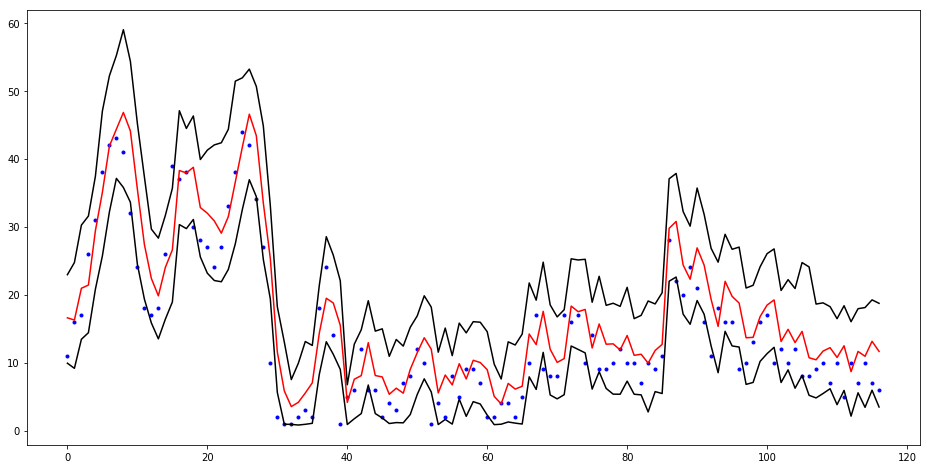

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [16.0, 8.0]

from sklearn.ensemble import GradientBoostingRegressor

np.random.seed(1)


def f(x):
    """The function to predict."""
    return x * np.sin(x)

#----------------------------------------------------------------------
#  First the noiseless case
X = np.atleast_2d(np.random.uniform(0, 10.0, size=100)).T
X = X.astype(np.float32)

# Observations
y = f(X).ravel()

dy = 1.5 + 1.0 * np.random.random(y.shape)
noise = np.random.normal(0, dy)
y += noise
y = y.astype(np.float32)

# Mesh the input space for evaluations of the real function, the prediction and
# its MSE
xx = np.atleast_2d(np.linspace(0, 10, 1000)).T
xx = xx.astype(np.float32)

data = pd.read_csv("./air-polution/data/many/dummy.csv")

target = "target"
exclude = ['datetime', target]
features = [f for f in data.columns if f not in exclude]
feature_size = len(features)

TestStart = '2016-12-26 00:00:00'
start = data[data.datetime.values == TestStart].index[0]

train = data[:start]
test = data[start:]

X_train, y_train = train[features], train[target]
X_test, y_test = test[features], test[target]

alpha = 0.95

clf = GradientBoostingRegressor(loss='quantile', alpha=alpha,
                                n_estimators=250, max_depth=3,
                                learning_rate=.1, min_samples_leaf=9,
                                min_samples_split=9)

clf.fit(X_train, y_train)

# Make the prediction on the meshed x-axis
y_upper = clf.predict(X_test)

clf.set_params(alpha=1.0 - alpha)
clf.fit(X_train, y_train)

# Make the prediction on the meshed x-axis
y_lower = clf.predict(X_test)

clf.set_params(loss='ls')
clf.fit(X_train, y_train)

# Make the prediction on the meshed x-axis
y_pred = clf.predict(X_test)

# Plot the function, the prediction and the 90% confidence interval based on
# the MSE
fig = plt.figure()
plt.plot(y_test.tolist(), 'b.')
plt.plot(y_pred, 'r-')
plt.plot(y_upper, 'k-')
plt.plot(y_lower, 'k-')

plt.show()